In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.formula.api as smf
import numpy as np 


In [2]:
car=pd.read_csv("Toyoto_Corrola1 - Copy.csv")

In [3]:
car.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [4]:
car.shape

(1436, 10)

In [5]:
car.describe()

,Id,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.0,1436.000000,1436.00000
mean,721.555014,10730.824513,55.947075,68533.259749,101.502089,4.033426,4.0,5.026462,1072.45961
std,416.476890,3626.964585,18.599988,37506.448872,14.981080,0.952677,0.0,0.188510,52.64112
min,1.000000,4350.000000,1.000000,1.000000,69.000000,2.000000,4.0,3.000000,1000.00000
25%,361.750000,8450.000000,44.000000,43000.000000,90.000000,3.000000,4.0,5.000000,1040.00000
50%,721.500000,9900.000000,61.000000,63389.500000,110.000000,4.000000,4.0,5.000000,1070.00000
75%,1081.250000,11950.000000,70.000000,87020.750000,110.000000,5.000000,4.0,5.000000,1085.00000
max,1442.000000,32500.000000,80.000000,243000.000000,192.000000,5.000000,4.0,6.000000,1615.00000


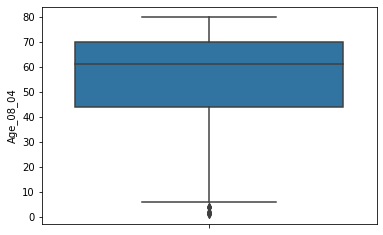

In [6]:
sns.boxplot(y='Age_08_04',data=car)

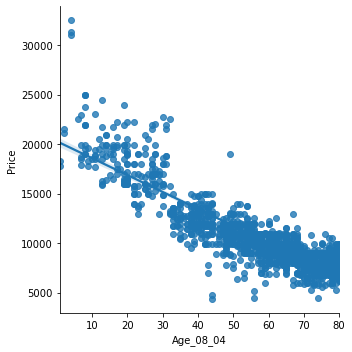

In [7]:
sns.lmplot(x='Age_08_04',y='Price',data=car) 
plt.xlim=(0,100)

In [8]:
print(car[car.Price>25000].index)
print(car[car.Price<5000].index)

Int64Index([109, 110, 111], dtype='int64')
Int64Index([191, 192, 393, 1048], dtype='int64')


In [9]:
car=car.drop(car.index[[109, 110, 111,191, 192, 393, 1048]]).reset_index()

In [10]:
car.shape

(1429, 11)

In [11]:
p=smf.ols('Price~Age_08_04',data=car).fit()
print(p.tvalues,'\n',p.pvalues)

Intercept    146.646793
Age_08_04    -72.125956
dtype: float64 
 Intercept    0.0
Age_08_04    0.0
dtype: float64


In [12]:
(p.rsquared,p.rsquared_adj)

(0.7847387308582208, 0.7845878820361172)

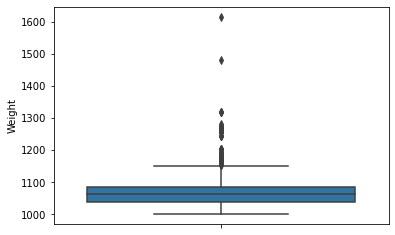

In [13]:
sns.boxplot(y='Weight',data=car)

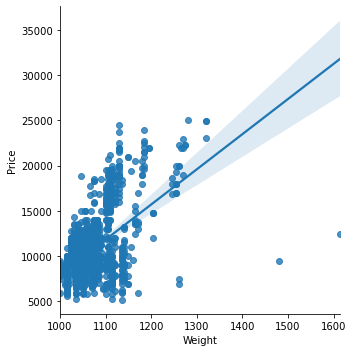

In [14]:
sns.lmplot(y='Price',x='Weight',data=car)

In [15]:
car[car.Weight>1400]

,index,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
216,221,223,TOYOTA Corolla 1.6 HB LINEA SOL 4/5-Doors,12450,44,74172,110,5,4,5,1615
954,960,964,TOYOTA Corolla,9390,66,50806,86,3,4,5,1480


In [16]:
car=car.drop(car.index[[216,954]],axis=0).reset_index()

In [17]:
car.shape

(1427, 12)

In [18]:
H=smf.ols('Price~Weight',data=car).fit()
print(H.tvalues,'\n',H.pvalues)

Intercept   -21.255678
Weight       27.402304
dtype: float64 
 Intercept     2.602366e-87
Weight       3.825759e-133
dtype: float64


In [19]:
(H.rsquared,H.rsquared_adj)

(0.3450944440050874, 0.3446348611587752)

Corelation Matrix

In [20]:
car.corr()

,level_0,index,Id,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
level_0,1.000000,0.999996,0.999995,-0.755306,0.906814,0.274241,-0.110458,-0.124069,NaN,-0.044140,-0.443019
index,0.999996,1.000000,0.999999,-0.756317,0.907376,0.275042,-0.110819,-0.123867,NaN,-0.044211,-0.443955
Id,0.999995,0.999999,1.000000,-0.756288,0.907348,0.275133,-0.110815,-0.123811,NaN,-0.044283,-0.443874
Price,-0.755306,-0.756317,-0.756288,1.000000,-0.885828,-0.566501,0.307251,0.182635,NaN,0.066789,0.587447
Age_08_04,0.906814,0.907376,0.907348,-0.885828,1.000000,0.505457,-0.153536,-0.141666,NaN,-0.006287,-0.491369
KM,0.274241,0.275042,0.275133,-0.566501,0.505457,1.000000,-0.323118,-0.034726,NaN,0.015565,-0.004915
HP,-0.110458,-0.110819,-0.110815,0.307251,-0.153536,-0.323118,1.000000,0.093352,NaN,0.210532,0.093265
Doors,-0.124069,-0.123867,-0.123811,0.182635,-0.141666,-0.034726,0.093352,1.000000,NaN,-0.160201,0.327796
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,-0.044140,-0.044211,-0.044283,0.066789,-0.006287,0.015565,0.210532,-0.160201,NaN,1.000000,0.028761


scatter plot amon variables along with histogram

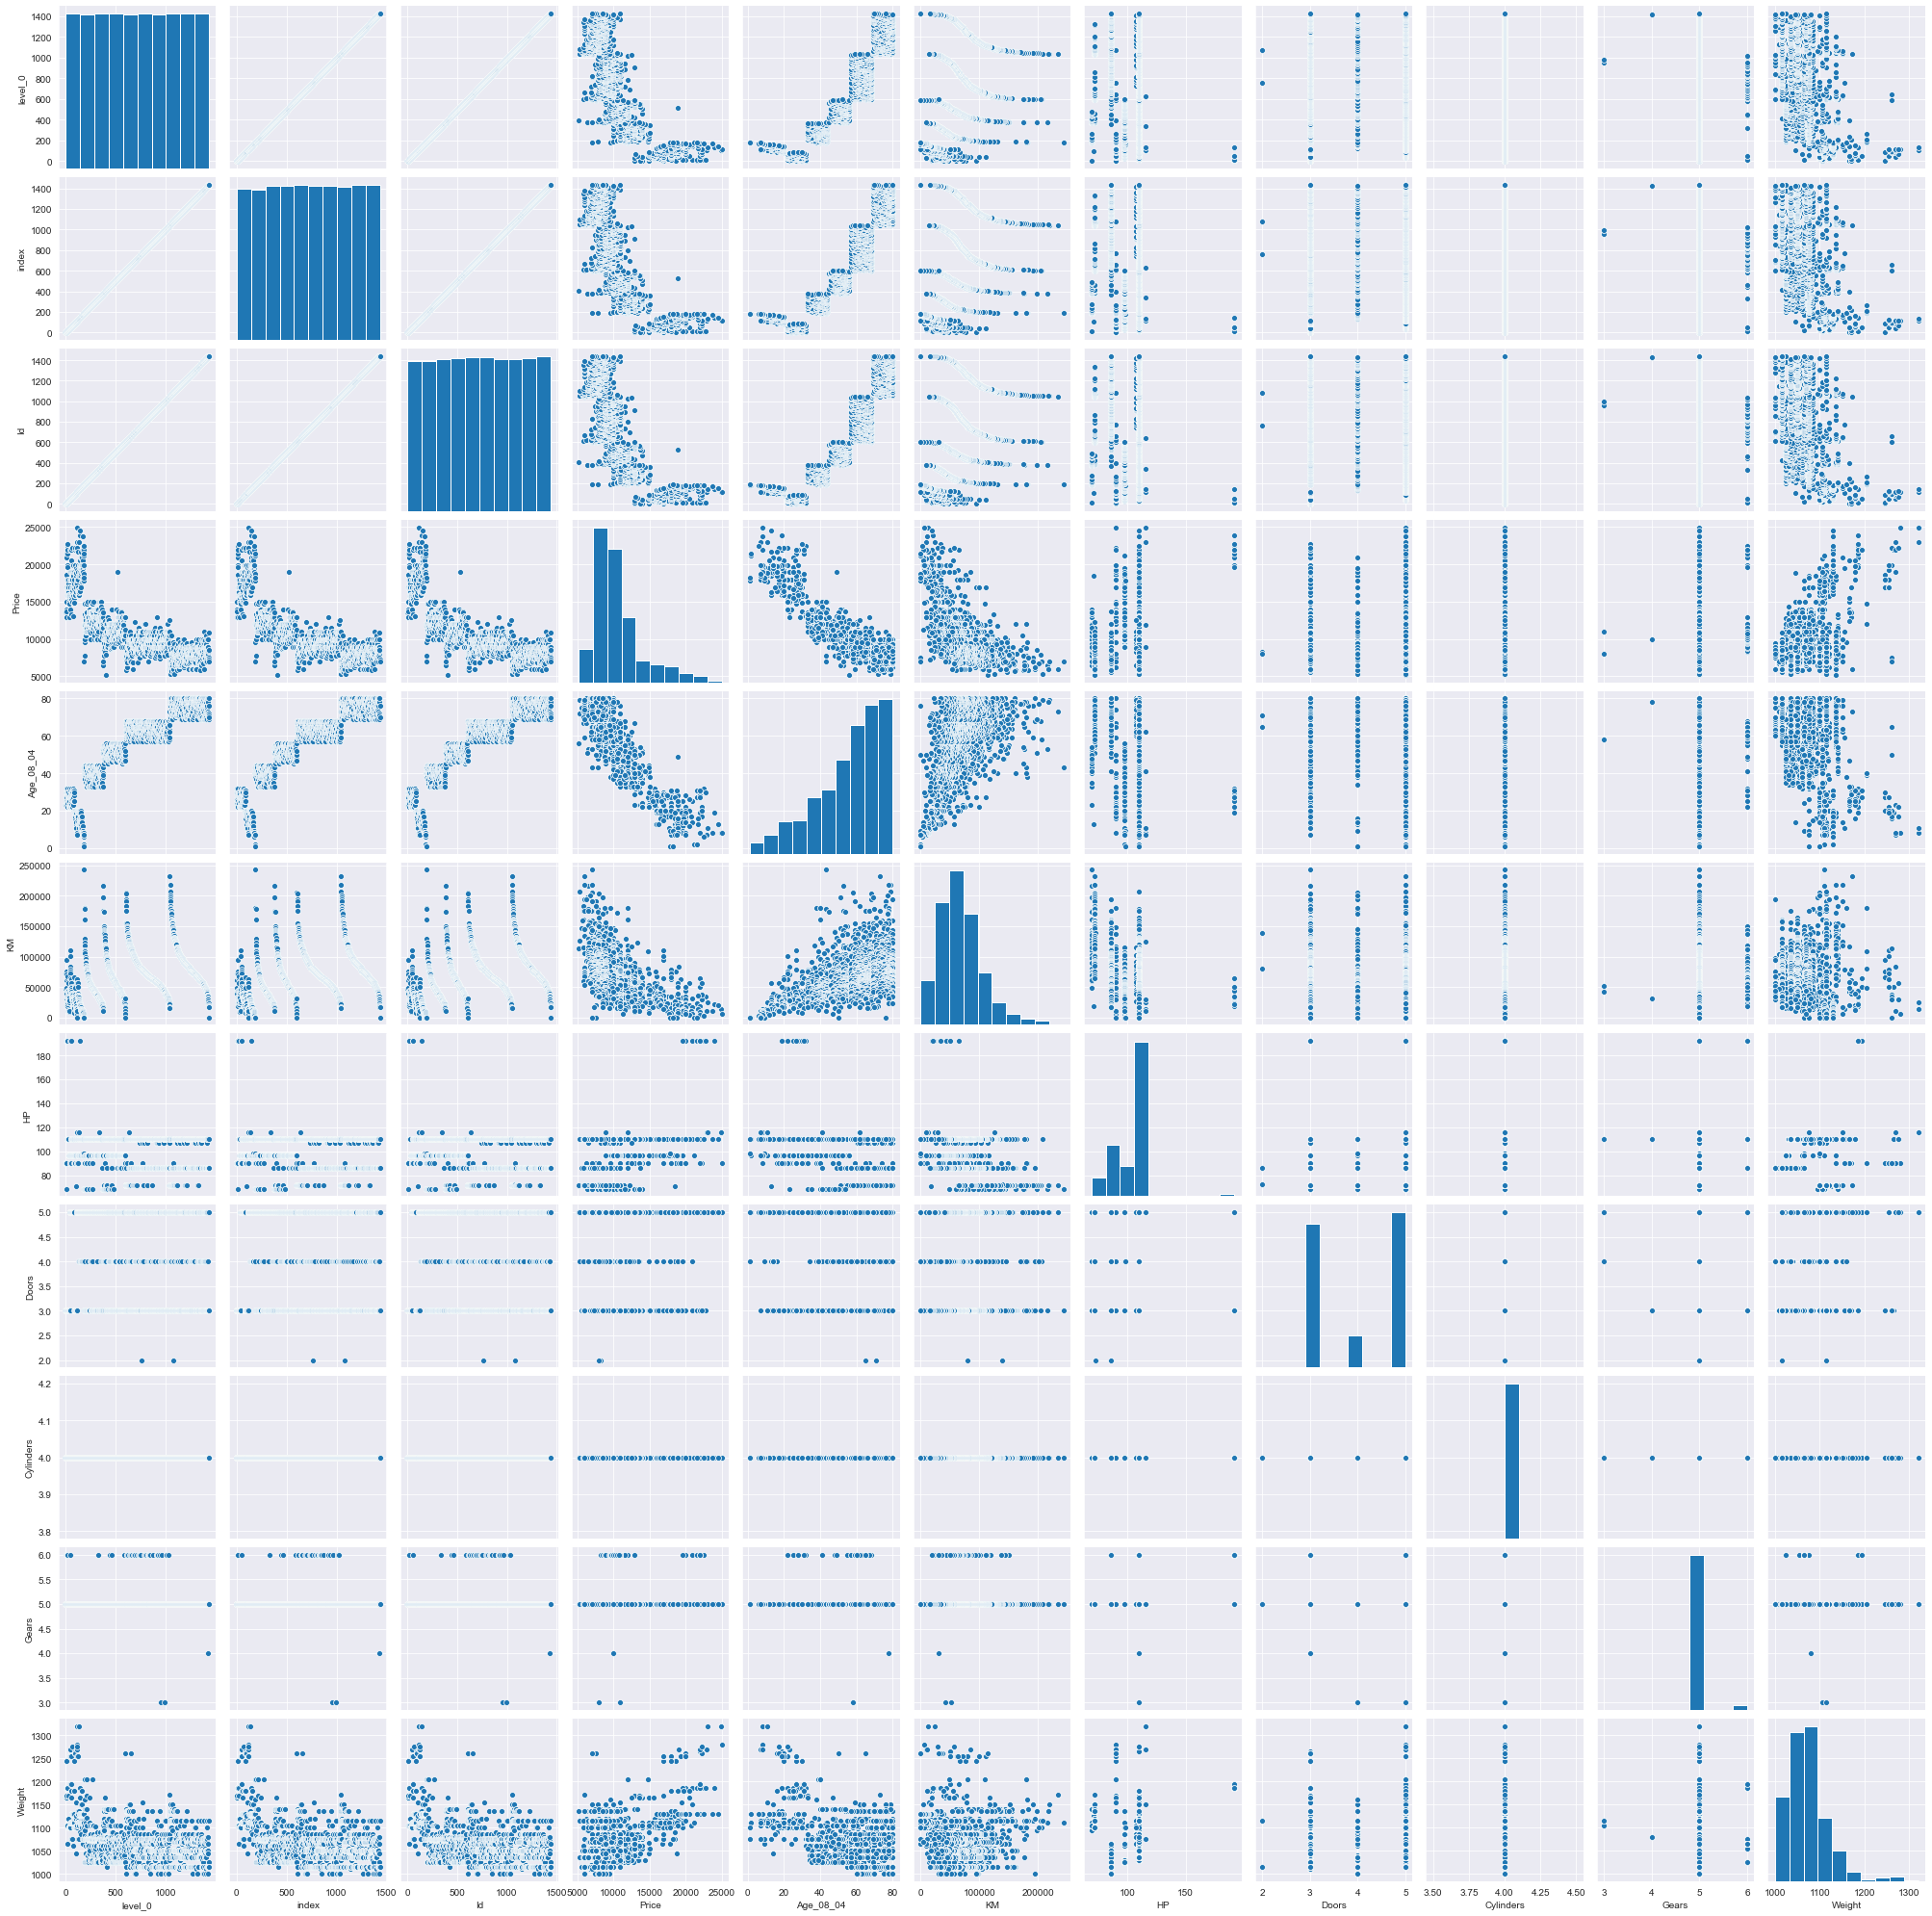

In [21]:
sns.set_style(style='darkgrid')
sns.pairplot(car)

Preparing model

In [22]:
model=smf.ols('Price~Age_08_04+KM+HP+Doors+Cylinders+Gears+Weight',data=car).fit()

In [23]:
model.params

Intercept    -510.824003
Age_08_04    -119.423582
KM             -0.019807
HP             25.934470
Doors         -23.892291
Cylinders   -2043.296011
Gears         629.726168
Weight         20.298253
dtype: float64

In [24]:
print(model.tvalues,'\n',model.pvalues)

Intercept    -6.551276
Age_08_04   -46.920479
KM          -17.084335
HP           10.563513
Doors        -0.630611
Cylinders    -6.551276
Gears         3.411781
Weight       21.827980
dtype: float64 
 Intercept     7.956237e-11
Age_08_04    5.556878e-291
KM            1.169619e-59
HP            3.669895e-25
Doors         5.283965e-01
Cylinders     7.956237e-11
Gears         6.635306e-04
Weight        2.566624e-91
dtype: float64


In [25]:
(model.rsquared,model.rsquared_adj)

(0.8709763144519631, 0.8704311439496475)

calculating VF

In [26]:
rA=smf.ols('Age_08_04~KM+HP+Doors+Cylinders+Gears+Weight',data=car).fit().rsquared
vA=1/(1-rA)
rK=smf.ols('KM~HP+Doors+Cylinders+Gears+Weight+Age_08_04',data=car).fit().rsquared
vK=1/(1-rK)
rH=smf.ols('HP~KM+Doors+Cylinders+Gears+Weight+Age_08_04',data=car).fit().rsquared
vH=1/(1-rH)
rD=smf.ols('Doors~KM+HP+Cylinders+Gears+Weight+Age_08_04',data=car).fit().rsquared
vD=1/(1-rD)
rC=smf.ols('Cylinders~KM+HP+Doors+Gears+Weight+Age_08_04',data=car).fit().rsquared
vC=1/(1-rC)
rW=smf.ols('Weight~KM+HP+Doors+Cylinders+Gears+Age_08_04',data=car).fit().rsquared
vW=1/(1-rW)
rG=smf.ols('Gears~KM+HP+Weight+Doors+Cylinders+Age_08_04',data=car).fit().rsquared
vG=1/(1-rG)
#d={'Variables':['Age','KM','HP','Doors','Cylinders','Weight'],'vif':[vA.vK,vH,vD,vC,vW]}
vif_frame=pd.DataFrame({'Variables':['Age','KM','HP','Doors','cylinders','Weight','Gears'],'vif':[vA,vK,vH,vD,vC,vW,vG]})
vif_frame

C:\Users\MRITYUNJAY\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Variables,vif
0,Age,1.996493
1,KM,1.674896
2,HP,1.208232
3,Doors,1.174036
4,cylinders,0.000000
5,Weight,1.643251
6,Gears,1.098154


Residual Analysis 

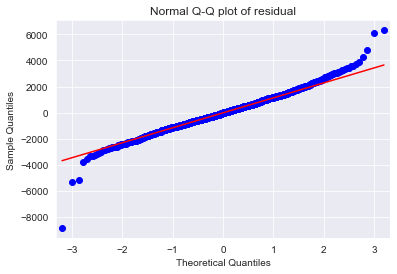

In [27]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residual")
plt.show()

In [28]:
list(np.where(model.resid<-4000))

[array([395, 594, 647], dtype=int64)]

Residual plot for Homoscedasticity

In [29]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

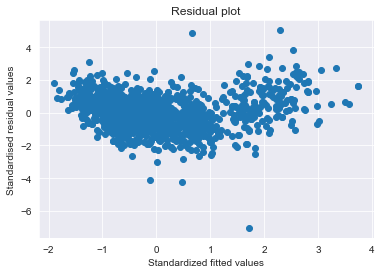

In [30]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardised residual values')
plt.show()


Residual vs Regressors

<function matplotlib.pyplot.show(*args, **kw)>

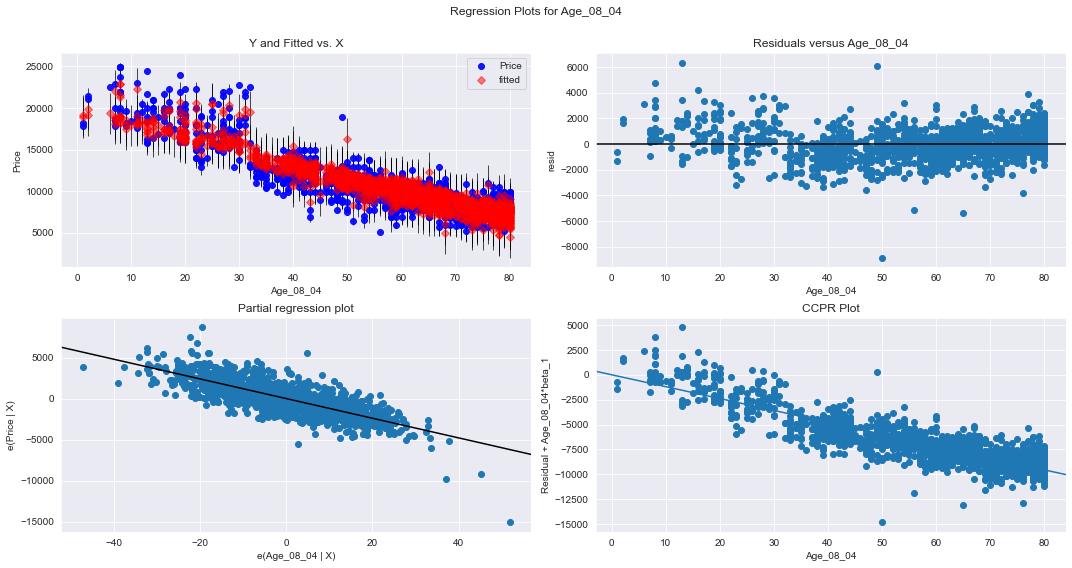

In [31]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Age_08_04',fig=fig)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

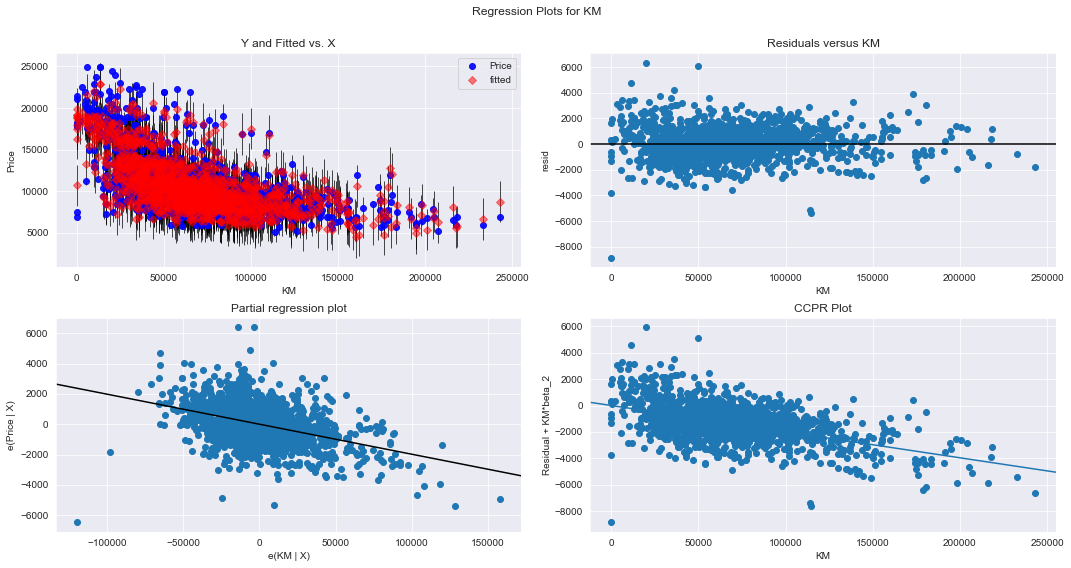

In [32]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

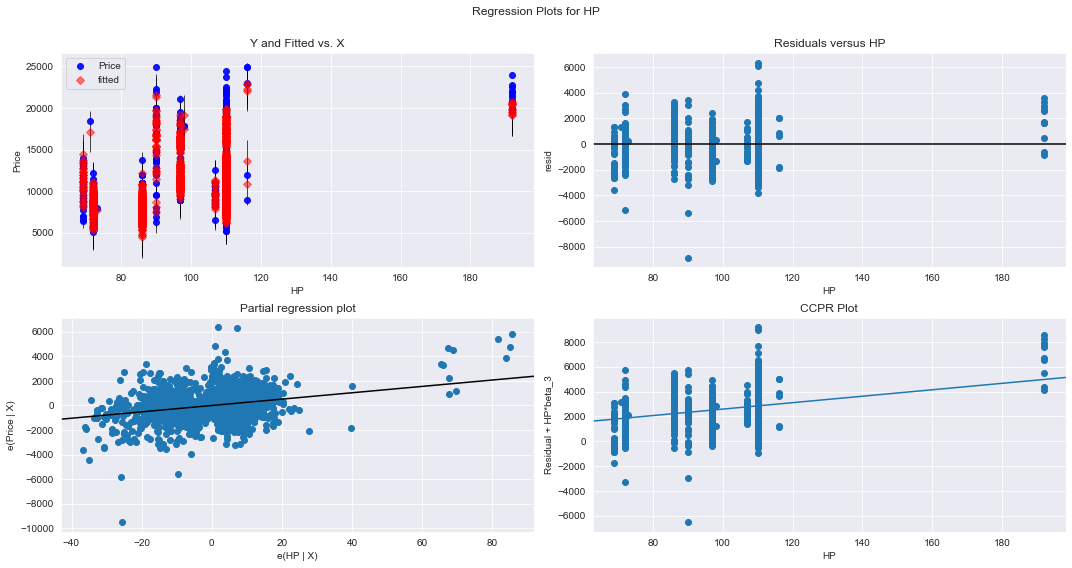

In [33]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

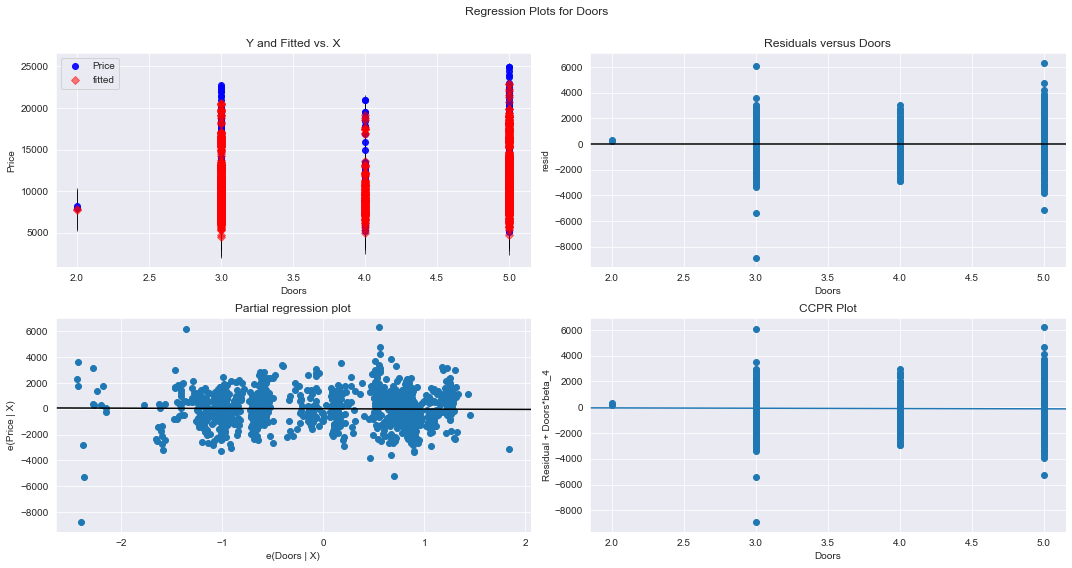

In [34]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show

ValueError: specify slope and intercepty or model_results

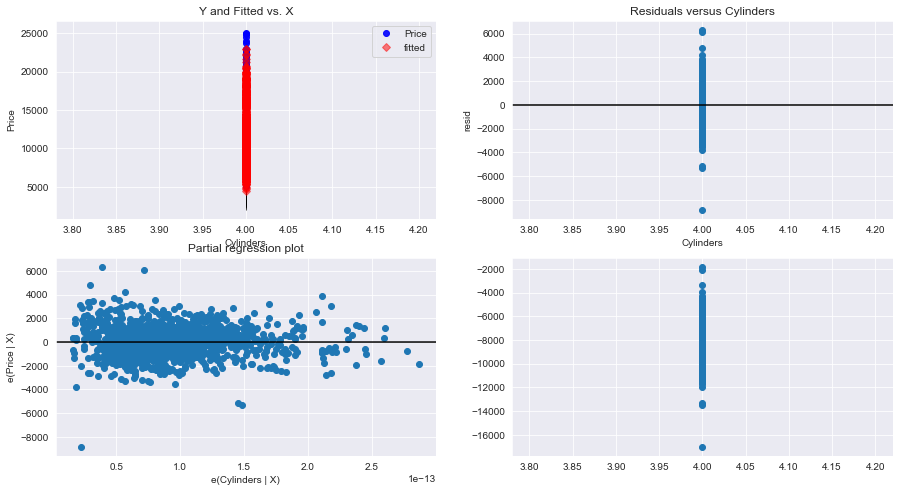

In [35]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Cylinders',fig=fig)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

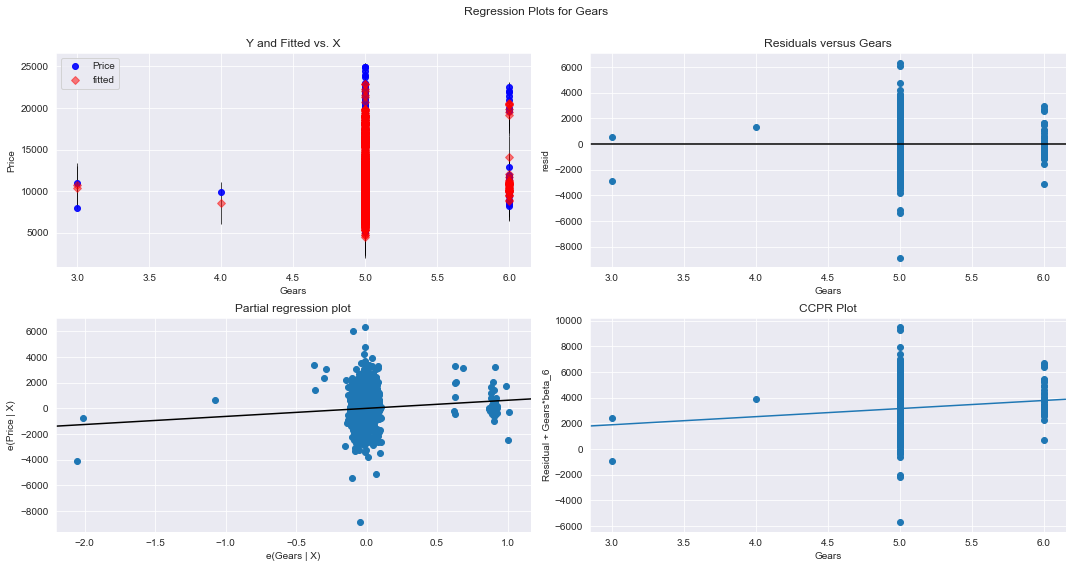

In [36]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

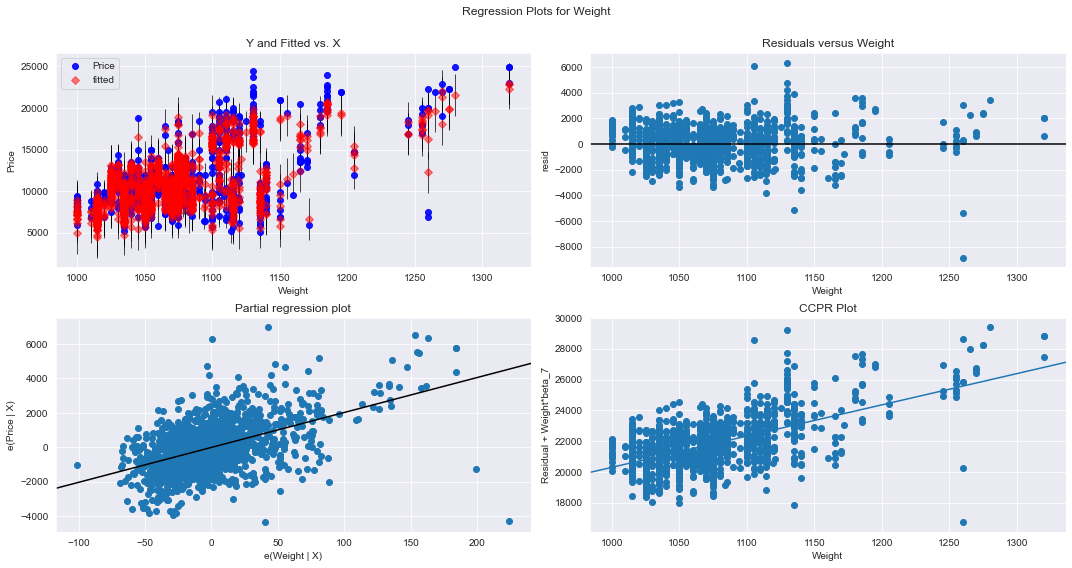

In [37]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show

Model deltion diagnostics
detecting Influencers and Outliers 
Cook's Distance

In [38]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

In [39]:
c

array([6.11340095e-03, 3.53041251e-03, 4.52826169e-03, ...,
       4.14773805e-06, 8.20999127e-04, 1.44097963e-02])

In [40]:
(np.argmax(c),np.max(c))

(594, 0.21718316604329707)

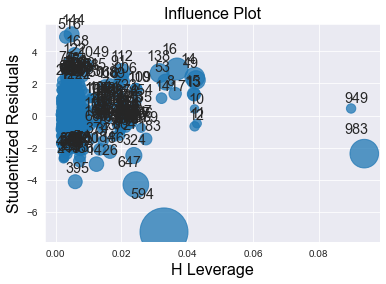

In [41]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [42]:
k = car.shape[1]
n = car.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [43]:
leverage_cutoff

0.027330063069376315

In [44]:
car[car.index.isin([594])]

,level_0,index,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
594,595,601,605,TOYOTA Corolla 2.0 d HB Diesel 2/3-Doors,7500,50,1,90,3,4,5,1260


In [45]:
car=car.drop(car.index[[594]],axis=0)

In [46]:
car=car.drop(['index','level_0'],axis=1)

In [47]:
car

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1422,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1423,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1424,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1425,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


Build Model

In [48]:
final=smf.ols('Price~Age_08_04+KM+HP+Doors+Cylinders+Gears+Weight',data=car).fit()

In [49]:
(final.rsquared,final.aic)

(0.8755359397575182, 24357.465158144478)

cooks's Distance

In [50]:
model_influence_V= final.get_influence()
(c_V, _) = model_influence_V.cooks_distance

<ipython-input-51-965318aacb8f>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(car)),np.round(c_V,3));


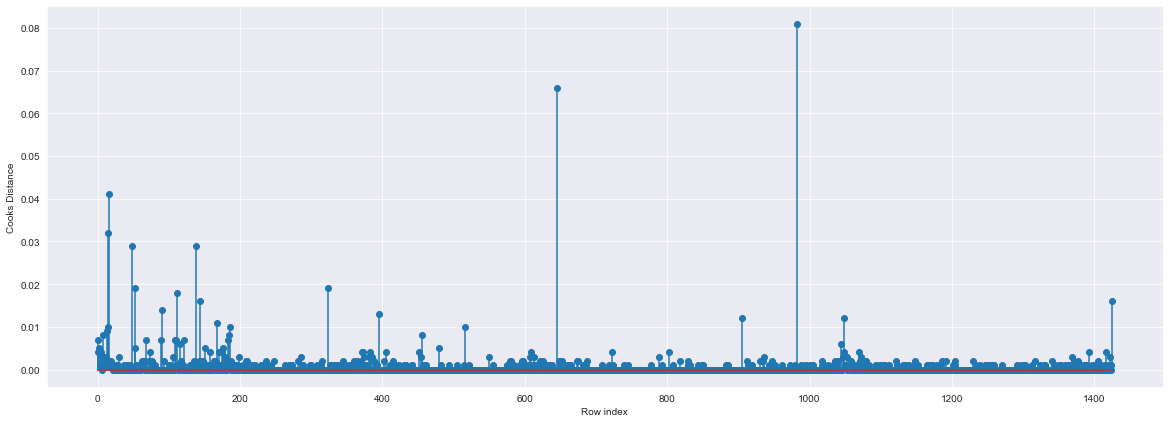

In [51]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [52]:
(np.argmax(c_V),np.max(c_V))

(982, 0.0810850510188622)

In [74]:
car=car.drop(car.index[[647, 983]],axis=0)

In [75]:
car.shape

(1408, 10)

In [76]:
final=smf.ols('Price~Age_08_04+KM+HP+Doors+Cylinders+Gears+Weight',data=car).fit()

In [77]:
(final.rsquared,final.aic)

(0.876066611712301, 23937.601975822072)

In [78]:
model_influence_V= final.get_influence()
(c_V, _) = model_influence_V.cooks_distance

<ipython-input-79-965318aacb8f>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(car)),np.round(c_V,3));


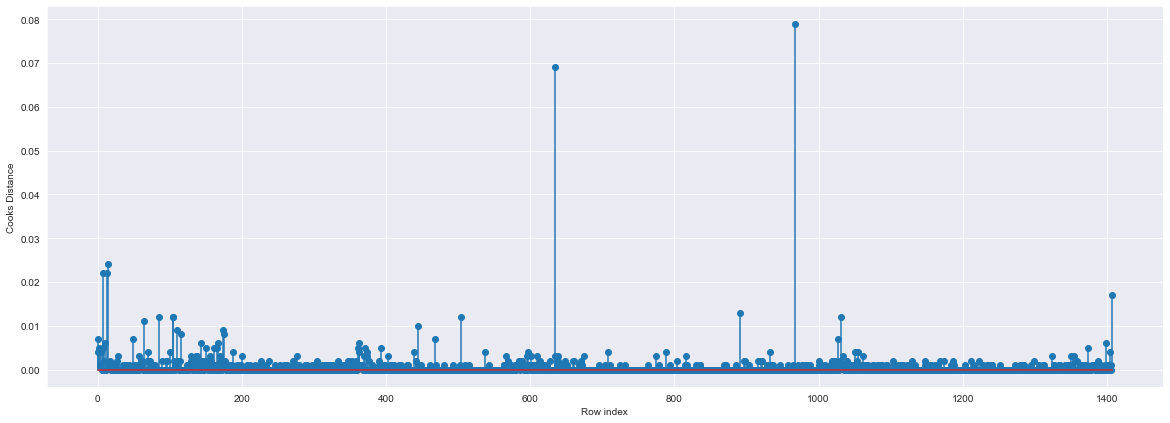

In [79]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [80]:
(np.argmax(c_V),np.max(c_V))

(967, 0.0791156371543311)

In [81]:
rows= np.array(c_V>.050)


In [82]:
car[rows].index

Int64Index([647, 983], dtype='int64')

Predicting new data

In [85]:
new_data=pd.DataFrame({'Age_08_04':56,"KM":68556,"HP":101,"Doors":4,"Cylinders":4,"Gears":5,"Weight":1069},index=[1])

In [83]:
car.describe()

,Id,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
count,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.0,1408.000000,1408.000000
mean,728.074574,10638.181108,56.275568,68556.589489,101.257102,4.029119,4.0,5.024858,1069.888494
std,414.864757,3364.449132,18.362865,36939.797166,13.936013,0.952238,0.0,0.184953,44.645882
min,1.000000,5250.000000,1.000000,1.000000,69.000000,2.000000,4.0,3.000000,1000.000000
25%,371.750000,8450.000000,44.000000,43243.000000,90.000000,3.000000,4.0,5.000000,1040.000000
50%,729.500000,9900.000000,61.000000,63567.000000,110.000000,4.000000,4.0,5.000000,1065.000000
75%,1088.250000,11906.250000,70.000000,87000.000000,110.000000,5.000000,4.0,5.000000,1085.000000
max,1442.000000,24950.000000,80.000000,243000.000000,192.000000,5.000000,4.0,6.000000,1320.000000


In [86]:
final.predict(new_data)

1    10631.131255
dtype: float64